# Project: hand-written digit classifier
This project builds a neural network to classify hand written digits. It uses modern modules and frameworks to attain accurate results efficiently.
- Author: Lucas Germinari Carreira 
- Github: Germinari1

Let's begin by loading the necessary resources. Firstly, we load the machine learning modules, and then the dataset to be used (in this case, the MNIST dataset). 

In [ ]:
#Import modules and libraries
import tensorflow as tf
import keras 
import numpy as np
import keras.utils 
import matplotlib.pyplot as plt
import keras.datasets.mnist as mnist
import sklearn as sk
from sklearn.model_selection import train_test_split
from keras import layers 
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random

In [4]:
#MNIST dataset information
mnist.load_data

<function keras.src.datasets.mnist.load_data(path='mnist.npz')>

In [2]:
#Load the MNIST dataset and unpack the values into inependent/features (X) and depedent/target variables (y)
(X_data, y_data), _ = mnist.load_data()

#check shape of the training and testing sets
X_data.shape, y_data.shape

((60000, 28, 28), (60000,))

Define some functions to quickly vizualize a portion of the dataset.

In [6]:
def display_image(X_data, y_data, index):
    img = X_data[index].reshape(28, 28)  # Reshape the 1D array to 28x28
    plt.imshow(img, cmap='binary')
    plt.title(f'Label: {y_data[index]}')
    plt.show()

def display_images_grid(X_data, y_data, indices, nrows=4, ncols=4):
    # Create a figure
    fig = plt.figure(figsize=(12, 8))

    # Iterate over the indices and display the corresponding images
    for i, idx in enumerate(indices):
        # Calculate the subplot position
        row = i // ncols
        col = i % ncols

        # Create a subplot at the calculated position
        ax = fig.add_subplot(nrows, ncols, i + 1)

        # Display the image
        img = X_data[idx].reshape(28, 28)  # Reshape the 1D array to 28x28
        ax.imshow(img, cmap='binary')
        ax.set_title(f'Label: {y_data[idx]}')
        ax.axis('off')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.2, hspace=0.4)

    # Display the figure
    plt.show()

Let's take a look at the dataset we are dealing with.

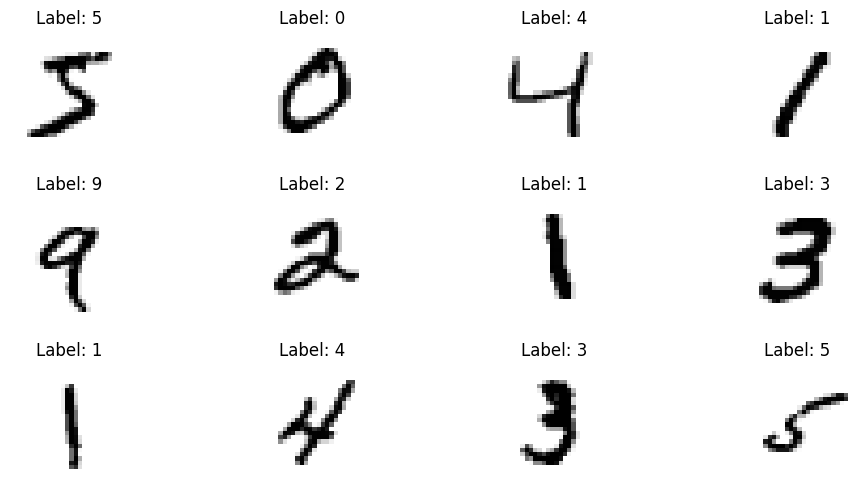

In [23]:
display_images_grid(X_data,y_data, range(12))

Now, we begin to prepare the data and split the dataset so it can be properly used to test and train the neural network that will be built. For the splitting taks, the following proportion is used:
<br>
- 60% train
- 20% cross validation set
- 20% test set
<br>
Given that MNIST has a robust size, such proportions can be successfully used.

In [3]:
#perform data normalization (normaliza the pixels to the range [0, 1])
X_data = X_data.reshape(X_data.shape[0], 28, 28, 1) / 255.0

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Depending on the loss function being used, the cells below might also be useful (for instance, if binary crossentropy is used rather than sparse binary crossentropy, which
will be used in this project).

In [63]:
#conver output labels to categorical
num_class = 10
y_train = keras.utils.to_categorical(y_train,num_classes=num_class)
y_val = keras.utils.to_categorical(y_val,num_classes=num_class)
y_test = keras.utils.to_categorical(y_test,num_classes=num_class)

In [64]:
#check result
for i in range(num_class):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Now, we can build the actual neural network. For this image recognition task, a convolutional neural network (CNN) will be used.

In [8]:
#define the input shape for the MNISt dataset
input_shape = (28, 28, 1)

# Create the sequential model
model = keras.Sequential()

# Add convolutional layers with ReLU activation and pooling layers (using max pooling)
# 1 layers with 128 filters, 3x3 kernel size, and 2x2 max pooling; 2 layers with 64 filters, 3x3 kernel size
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Add dense (fully connected) layers with ReLU activation for hidden layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with linear activation and 10 units (for 10 classes/digits)
model.add(layers.Dense(10, activation='linear'))  

# Compile the model with softmax cross-entropy loss and Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

2024-04-18 09:23:20.113264: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-18 09:23:20.114249: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Somes notes about the sequential model above:
* It uses 3 convolutional layers and 2 pooling layers: 1 layers with 128 filters, 3x3 kernel size, and 2x2 max pooling, along with 2 layers with 64 filters, 3x3 kernel size, 2x2 max pooling
* The output layer activation functino was set to linear, so the loss function was instructed to operate on logits. This is done for improved efficiency and numerical stability. Afterwards, softmax will be applied.
* The Adam optimizer is used.

Now, let`s train the model with 40 epochs.

In [43]:
history = tf.keras.callbacks.History()

model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_val, y_val), verbose=1, callbacks=[history])

Epoch 1/40
563/563 [==============================] - 27s 46ms/step - loss: 1.2955 - accuracy: 0.5319 - val_loss: 0.4710 - val_accuracy: 0.8547
Epoch 2/40
563/563 [==============================] - 27s 48ms/step - loss: 0.3698 - accuracy: 0.8825 - val_loss: 0.3058 - val_accuracy: 0.9007
Epoch 3/40
563/563 [==============================] - 24s 42ms/step - loss: 0.2585 - accuracy: 0.9169 - val_loss: 0.2140 - val_accuracy: 0.9308
Epoch 4/40
563/563 [==============================] - 25s 44ms/step - loss: 0.2025 - accuracy: 0.9356 - val_loss: 0.1783 - val_accuracy: 0.9433
Epoch 5/40
563/563 [==============================] - 24s 44ms/step - loss: 0.1666 - accuracy: 0.9469 - val_loss: 0.1540 - val_accuracy: 0.9507
Epoch 6/40
563/563 [==============================] - 24s 42ms/step - loss: 0.1386 - accuracy: 0.9571 - val_loss: 0.1245 - val_accuracy: 0.9616
Epoch 7/40
563/563 [==============================] - 25s 44ms/step - loss: 0.1183 - accuracy: 0.9617 - val_loss: 0.1068 - val_accuracy:

In [55]:
# apply the softmax funciton
probability_distrib = tf.nn.softmax(model.predict(X_test))

375/375 [==============================] - 3s 9ms/step


In [61]:
print(sum(probability_distrib[100]))

tf.Tensor(1.0, shape=(), dtype=float32)


The sum of the predictions (after the softmax was applied) is 1, indicating that the model behaves probabilistically well. Let`s get some information about the model that was trained. 

In [9]:
#function to plot learning curve
def plot_loss_tf(history):
    """
    Given the history of a model, displays the learning curve
    """
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss/Accuracy')
    plt.legend()
    plt.show()

In [45]:
# General architectural of the neural network
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)             

More specifically, let`s assess some metrics regarding model performance. 

In [46]:
# Evaluate (loss and accuracy) the model using the test dataset
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f'validation set loss: {val_loss:.4f}, validation set accuracy: {val_acc:.4f}')

print('--------------------------------------------')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

validation set loss: 0.1296, validation set accuracy: 0.9754
--------------------------------------------
Test loss: 0.1329, Test accuracy: 0.9749


The accuracy for both validation and test sets are high and do not differ by any substancial amount. This indicates that the model does not suffer from high bias or variance. 

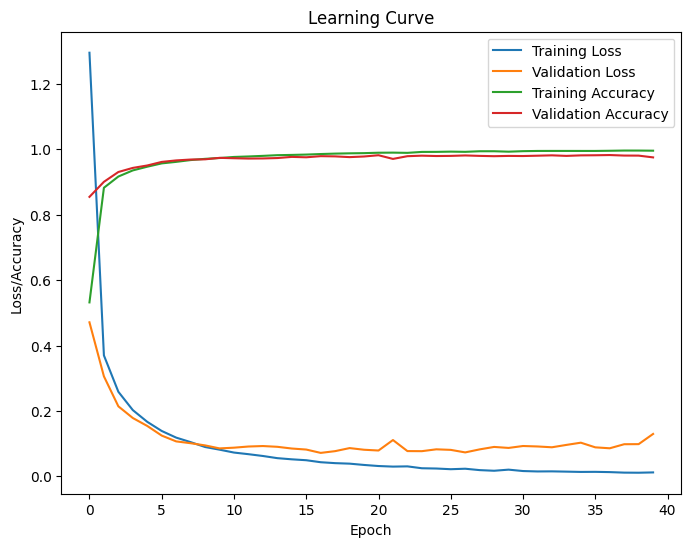

In [47]:
# Plot the learning curve
plot_loss_tf(history)

375/375 [==============================] - 3s 8ms/step


Text(0.5, 1.0, 'Confusion Matrix')

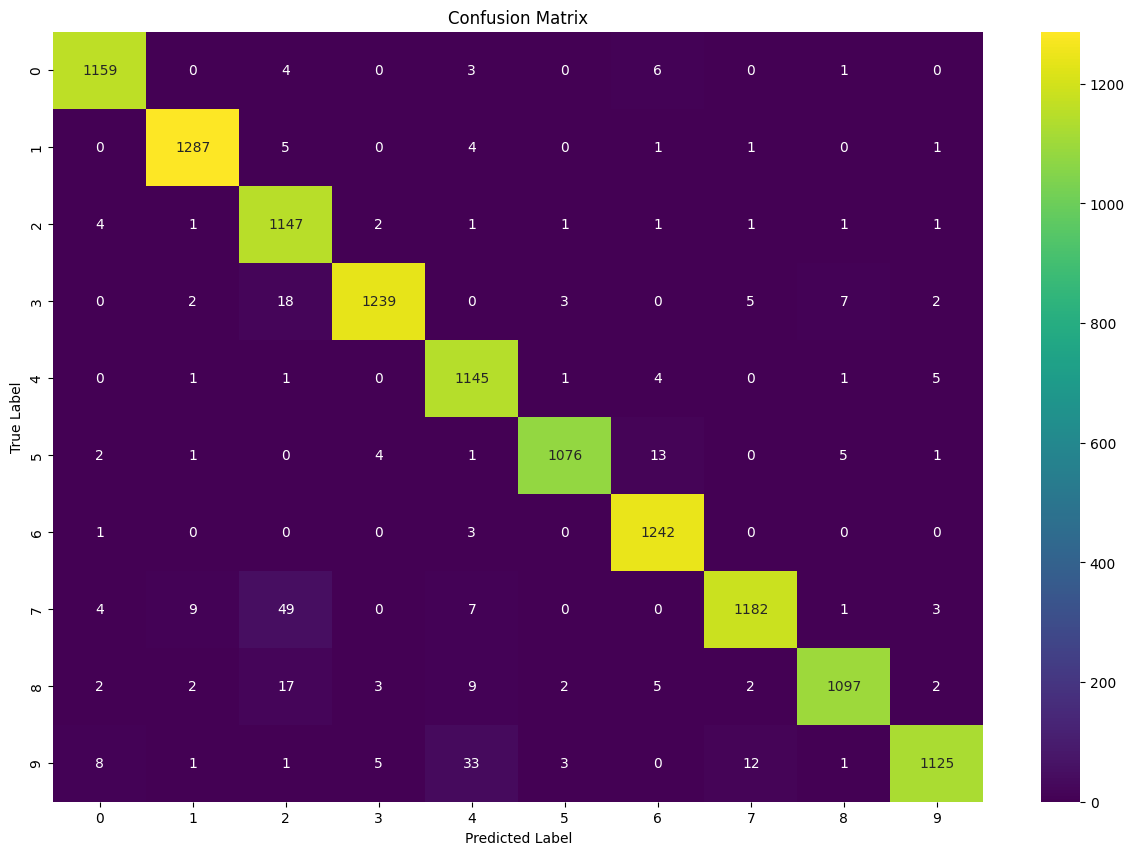

In [52]:
# Get predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

confusion_mtx = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with matplotlib and seaborn
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")

The model in general is consistent in its predictions. however, some specefic case present higher rates of wrong classifications. More specifically, the model sometimes misclassifies the number 7 (predicting 2) and 9 (predicting 4). This may indicate that performing error analysis could improve the model, as well as trying different model configurations.

Finally, let`s visualize some predictions.

In [65]:
def display_random_predictions(model, x_test, y_test, num_examples=12):
    indices = random.sample(range(len(x_test)), num_examples)

    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(indices):
        img = x_test[idx]
        true_label = y_test[idx]
        prediction = model.predict(np.expand_dims(img, axis=0))
        pred_label = np.argmax(prediction, axis=1)[0]

        plt.subplot(3, 4, i+1)
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_label}, Pred: {pred_label}', fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 30ms/step


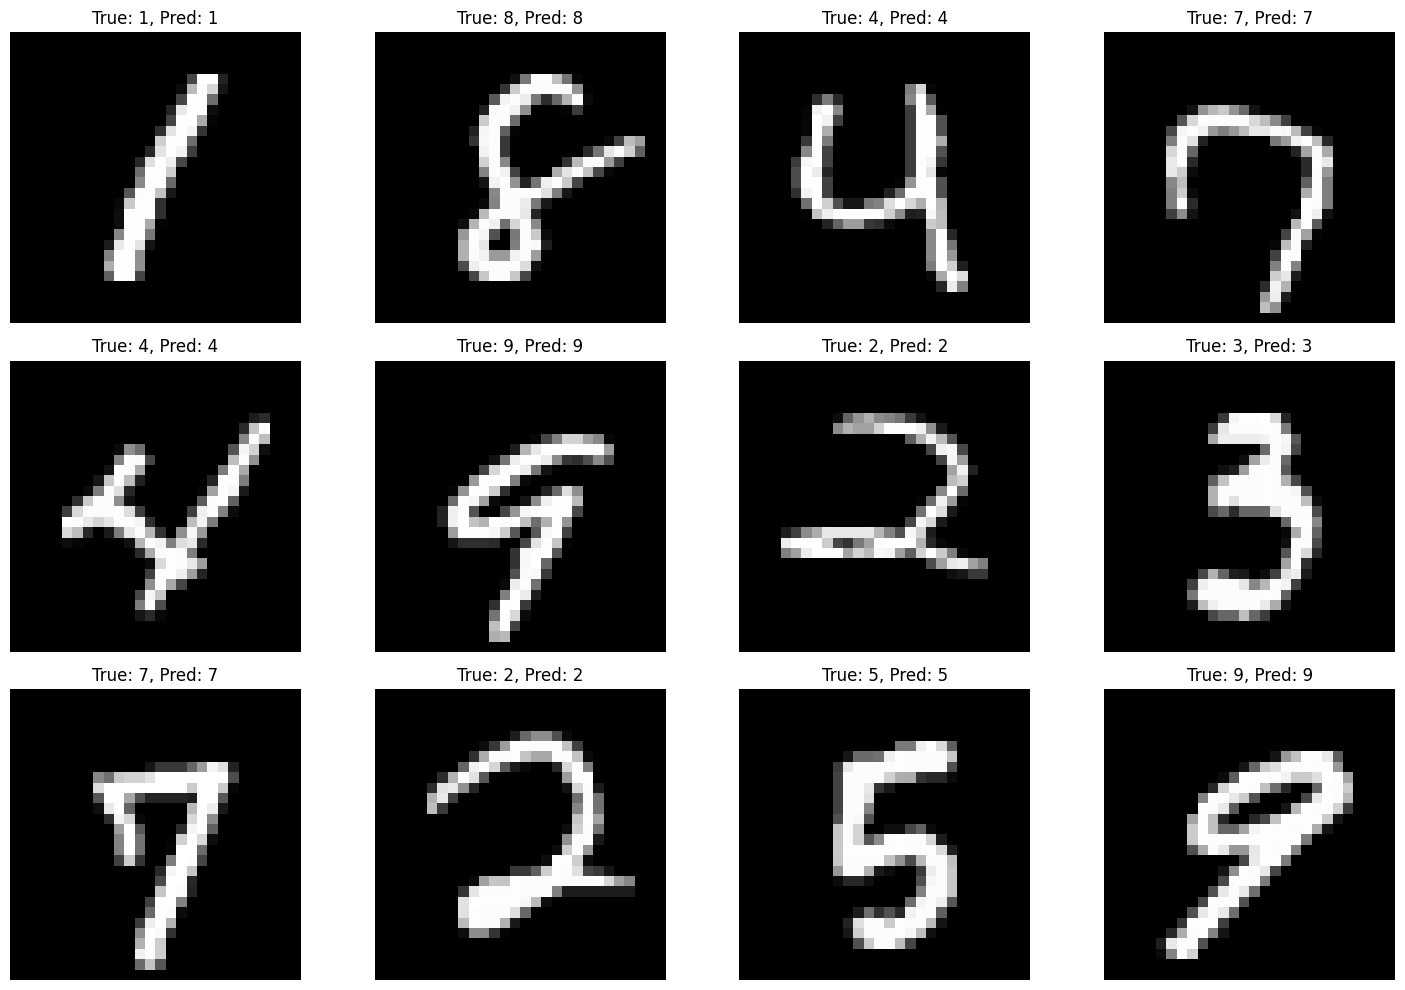

In [66]:
display_random_predictions(model, X_test, y_test)

### Trying another neural network architecture
Now, let`s try a different architecture for the convolutional neural network in order to hopefully achieve better results. The next cell will define this new model.

In [12]:
model_V2 = keras.Sequential([
    
# Layer 1
layers.Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.0005), name = 'convolution_1'),

# Layer 2
layers.Conv2D(filters = 32, kernel_size = 5, strides = 1, name = 'convolution_2', use_bias=False),

# Layer 3    
layers.BatchNormalization(name = 'batchnorm_1'),
    
# -------------------------------- #  
layers.Activation("relu"),
layers.MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_1'),
layers.Dropout(0.25, name = 'dropout_1'),
# -------------------------------- #  
    
# Layer 3
layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005), name = 'convolution_3'),
    
# Layer 4
layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, name = 'convolution_4', use_bias=False),
    
# Layer 5
layers.BatchNormalization(name = 'batchnorm_2'),
    
# -------------------------------- #  
layers.Activation("relu"),
layers.MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_2'),
layers.Dropout(0.25, name = 'dropout_2'),
layers.Flatten(name = 'flatten'),
# -------------------------------- #  
    
# Layer 6
layers.Dense(units = 256, name = 'fully_connected_1', use_bias=False),
    
# Layer 7
layers.BatchNormalization(name = 'batchnorm_3'),

# -------------------------------- #  
layers.Activation("relu"),
# -------------------------------- #  
    
# Layer 8
layers.Dense(units = 128, name = 'fully_connected_2', use_bias=False),
    
# Layer 9
layers.BatchNormalization(name = 'batchnorm_4'),
    
# -------------------------------- #  
layers.Activation("relu"),
# -------------------------------- #  
    
# Layer 10
layers.Dense(units = 84, name = 'fully_connected_3', use_bias=False),
    
# Layer 11
layers.BatchNormalization(name = 'batchnorm_5'),
    
# -------------------------------- #  
layers.Activation("relu"),
layers.Dropout(0.25, name = 'dropout_3'),
# -------------------------------- #  

# Output
layers.Dense(units = 10, activation = 'linear', name = 'output')
    
])

Some notes on this new CNN:
- It uses different numbers of layers, filters, and kernel sizes.
- Differently from the first one, our new model uses regularizations on it`s learning in order to prevent overfitting. Also, it uses bacth normalization layers and dropout layers.

For compiling and fitting, similar procedures will be used when compared to the first model.

In [16]:
model_V2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history_V2 = tf.keras.callbacks.History()

In [17]:
model_V2.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), verbose=1, callbacks=[history_V2])

Epoch 1/30
563/563 [==============================] - 32s 55ms/step - loss: 0.3080 - accuracy: 0.9157 - val_loss: 0.1331 - val_accuracy: 0.9666
Epoch 2/30
563/563 [==============================] - 32s 57ms/step - loss: 0.1128 - accuracy: 0.9725 - val_loss: 0.0736 - val_accuracy: 0.9834
Epoch 3/30
563/563 [==============================] - 30s 53ms/step - loss: 0.0885 - accuracy: 0.9791 - val_loss: 0.0596 - val_accuracy: 0.9868
Epoch 4/30
563/563 [==============================] - 33s 58ms/step - loss: 0.0747 - accuracy: 0.9826 - val_loss: 0.0547 - val_accuracy: 0.9873
Epoch 5/30
563/563 [==============================] - 32s 56ms/step - loss: 0.0668 - accuracy: 0.9838 - val_loss: 0.0499 - val_accuracy: 0.9893
Epoch 6/30
563/563 [==============================] - 28s 50ms/step - loss: 0.0605 - accuracy: 0.9862 - val_loss: 0.0531 - val_accuracy: 0.9874
Epoch 7/30
563/563 [==============================] - 26s 47ms/step - loss: 0.0540 - accuracy: 0.9875 - val_loss: 0.0480 - val_accuracy:

In [22]:
#applying the softmax function to the model predictions (was not done directly on the output layer to increase numerical stability)
probability_distrib_V2 = tf.nn.softmax(model_V2.predict(X_test))

375/375 [==============================] - 4s 10ms/step


Now, let`s repeat the evaluation precedures for our second model.

In [20]:
val_loss, val_acc = model_V2.evaluate(X_val, y_val, verbose=0)
print(f'validation set loss: {val_loss:.4f}, validation set accuracy: {val_acc:.4f}')

print('--------------------------------------------')

test_loss, test_acc = model_V2.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

validation set loss: 0.0326, validation set accuracy: 0.9937
--------------------------------------------
Test loss: 0.0363, Test accuracy: 0.9928


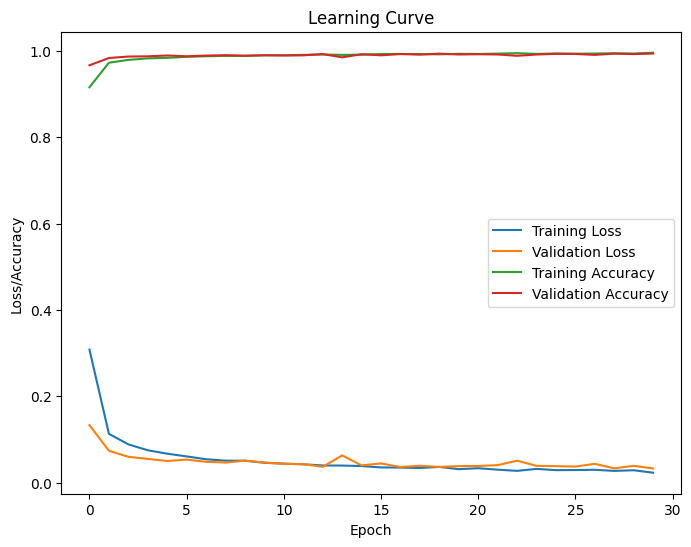

In [21]:
plot_loss_tf(history_V2)

Text(0.5, 1.0, 'Confusion Matrix')

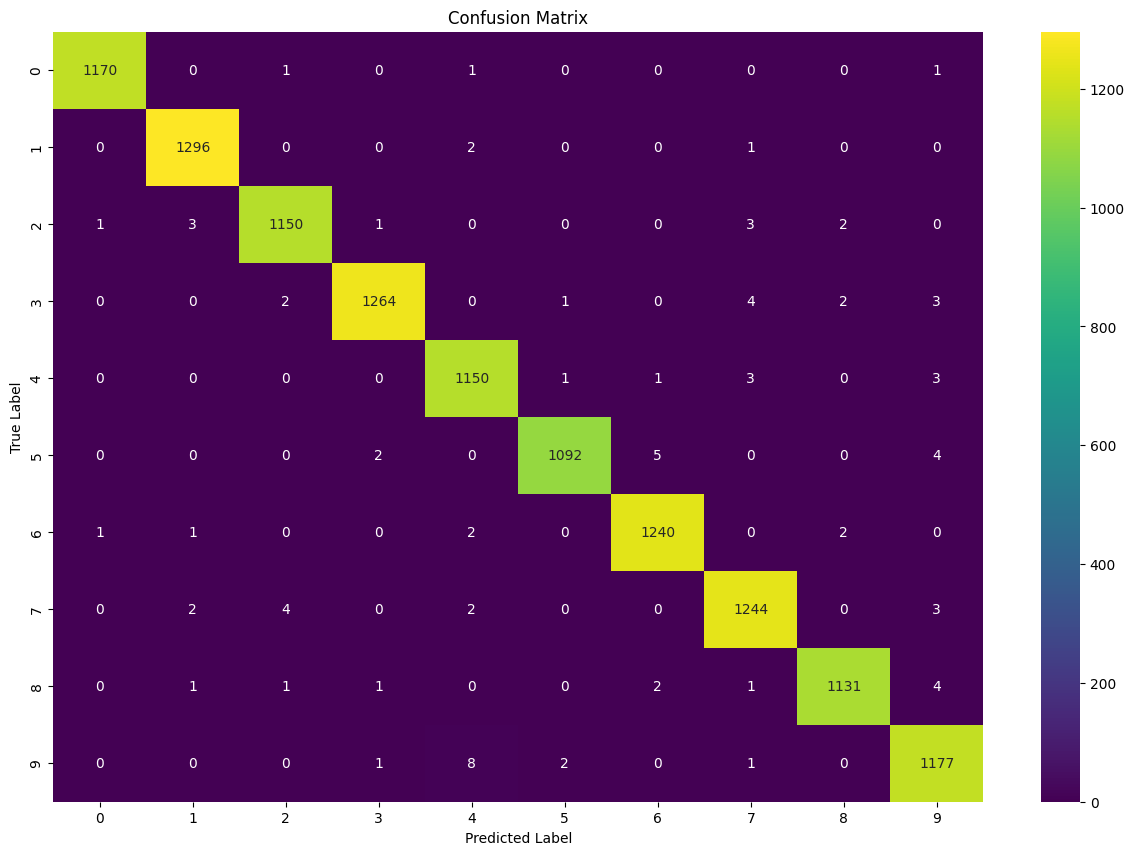

In [24]:
# Get predictions on the test set
y_pred_V2 = np.argmax(probability_distrib_V2, axis=1)

confusion_mtx = confusion_matrix(y_test, y_pred_V2)

# visualize confusion matrix with matplotlib and seaborn
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")

As it is possible to assess, this model attained higher levels of accuracy on our validation and tests sets, while also having fewer misclassifications. On the test set, the results were as follows:
- Loss: 0.0363
- Test accuracy: 0.9928